In [15]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm

In [16]:
pip install scikit-learn-extra

In [17]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn_extra.cluster import KMedoids
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (13, 8)
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
original = pd.read_csv('/content/drive/MyDrive/EM:IP/3_Outliers_3_FullC_with_ln_scoring_gender_time_cleaning', sep=',')
original.head()

,Unnamed: 0,ID,cnt,time_a,time_b1,time_b2,time_start,time_solving,time_total,time_answer,...,time_avg_btw_events,events_num,sequence,length,credit,OECD,ratio,mean,weight,gender
0,0,ARE000027907117,ARE,2.442347,2.197225,3.594569,1.799397,1.644610,1.855088,1.610540,...,1.665188,15,bab,3,1,0,0.64,391.500000,7638.195150,2
1,1,ARE000011302798,ARE,4.989071,2.104134,0.000000,1.477276,1.854589,1.873494,1.797899,...,2.112231,30,aab,3,1,0,0.37,212.100000,4349.167700,2
2,2,ARE000018804820,ARE,3.837299,2.442347,0.000000,1.554537,1.627475,1.724756,1.617663,...,1.928619,10,ab,2,1,0,0.28,168.500000,3287.447976,1
3,3,ARE000039910042,ARE,2.476538,1.667707,5.239469,1.406565,1.661441,1.708899,1.557544,...,0.968839,43,babab,5,1,0,0.37,227.000000,4428.787482,1
4,4,ARE000006001557,ARE,3.214868,1.568616,3.449988,1.203616,1.702884,1.720808,1.625493,...,1.509397,25,abab,4,1,0,0.61,338.428571,7308.636611,2


In [20]:
original[original.isnull().any(axis=1)]

,Unnamed: 0,ID,cnt,time_a,time_b1,time_b2,time_start,time_solving,time_total,time_answer,...,time_avg_btw_events,events_num,sequence,length,credit,OECD,ratio,mean,weight,gender


In [21]:
df = original[['ID','time_b1','time_b2','time_total','time_irrelevant','time_ticket_explore','time_avg_btw_events','length']]
df.set_index('ID', inplace=True)
df

,time_b1,time_b2,time_total,time_irrelevant,time_ticket_explore,time_avg_btw_events,length
ID,,,,,,,
ARE000027907117,2.197225,3.594569,1.855088,1.233613,0.000000,1.665188,3
ARE000011302798,2.104134,0.000000,1.873494,1.646667,0.000000,2.112231,3
ARE000018804820,2.442347,0.000000,1.724756,0.859075,0.000000,1.928619,2
ARE000039910042,1.667707,5.239469,1.708899,1.481118,0.628859,0.968839,5
ARE000006001557,1.568616,3.449988,1.720808,1.488570,1.144244,1.509397,4
...,...,...,...,...,...,...,...
USA000015004612,2.230014,0.000000,1.514410,0.670652,0.000000,1.178655,2
USA000015004637,2.525729,0.000000,1.636112,0.988202,0.000000,1.642873,2
USA000007902358,2.631889,0.000000,1.673242,0.628859,0.000000,1.984444,2


In [23]:
df = df[np.isfinite(df).all(1)]
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7191 entries, ARE000027907117 to USA000007902381
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time_b1              7191 non-null   float64
 1   time_b2              7191 non-null   float64
 2   time_total           7191 non-null   float64
 3   time_irrelevant      7191 non-null   float64
 4   time_ticket_explore  7191 non-null   float64
 5   time_avg_btw_events  7191 non-null   float64
 6   length               7191 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 449.4+ KB


In [10]:
df_2 = df[['time_b1','time_b2','time_total','time_irrelevant','time_ticket_explore','time_avg_btw_events','length']]
df_2

,time_b1,time_b2,time_total,time_irrelevant,time_ticket_explore,time_avg_btw_events,length
ID,,,,,,,
ARE000027907117,2.197225,3.594569,1.855088,1.233613,0.000000,1.665188,3
ARE000011302798,2.104134,0.000000,1.873494,1.646667,0.000000,2.112231,3
ARE000018804820,2.442347,0.000000,1.724756,0.859075,0.000000,1.928619,2
ARE000039910042,1.667707,5.239469,1.708899,1.481118,0.628859,0.968839,5
ARE000006001557,1.568616,3.449988,1.720808,1.488570,1.144244,1.509397,4
...,...,...,...,...,...,...,...
USA000015004612,2.230014,0.000000,1.514410,0.670652,0.000000,1.178655,2
USA000015004637,2.525729,0.000000,1.636112,0.988202,0.000000,1.642873,2
USA000007902358,2.631889,0.000000,1.673242,0.628859,0.000000,1.984444,2


In [11]:
x = df_2.to_numpy()
x = RobustScaler().fit_transform(x)
df_scale = pd.DataFrame(x, columns = df_2.columns, index = df_2.index)
df_scale

,time_b1,time_b2,time_total,time_irrelevant,time_ticket_explore,time_avg_btw_events,length
ID,,,,,,,
ARE000027907117,-0.111494,0.644486,2.633435,0.696446,0.000000,0.620707,0.0
ARE000011302798,-0.250064,-0.640536,2.845464,1.633623,0.000000,1.615650,0.0
ARE000018804820,0.253383,-0.640536,1.132037,-0.153341,0.000000,1.207001,-0.5
ARE000039910042,-0.899709,1.232522,0.949362,1.258008,0.628859,-0.929091,1.0
ARE000006001557,-1.047211,0.592800,1.086552,1.274917,1.144244,0.273977,0.5
...,...,...,...,...,...,...,...
USA000015004612,-0.062685,-0.640536,-1.291097,-0.580854,0.000000,-0.462124,-0.5
USA000015004637,0.377501,-0.640536,0.110881,0.139633,0.000000,0.571042,-0.5
USA000007902358,0.535526,-0.640536,0.538604,-0.675679,0.000000,1.331245,-0.5


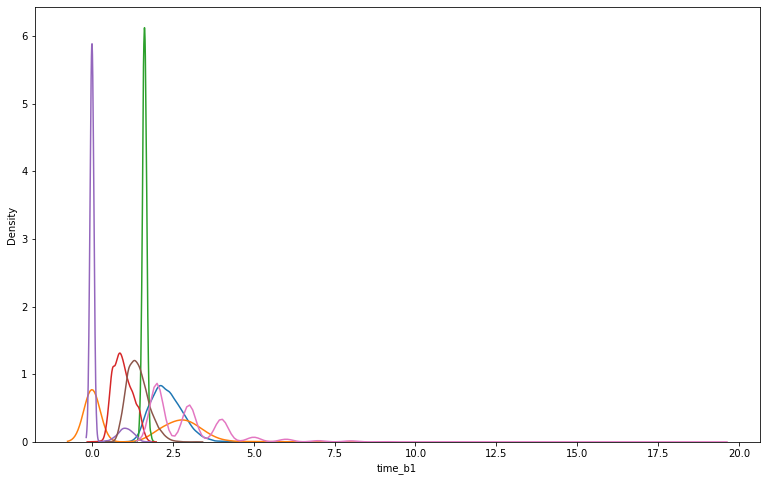

In [12]:
sns.kdeplot(df['time_b1'])
sns.kdeplot(df['time_b2'])
sns.kdeplot(df['time_total'])
sns.kdeplot(df['time_irrelevant'])
sns.kdeplot(df['time_ticket_explore'])
sns.kdeplot(df['time_avg_btw_events'])
sns.kdeplot(df['length'])

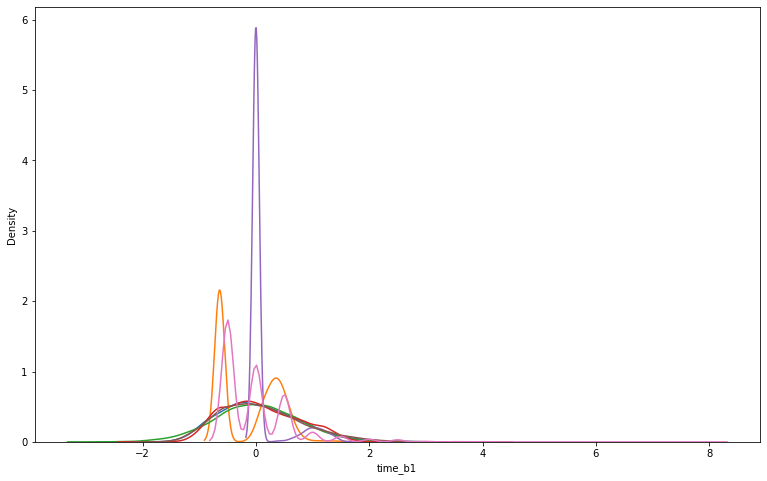

In [13]:
sns.kdeplot(df_scale['time_b1'])
sns.kdeplot(df_scale['time_b2'])
sns.kdeplot(df_scale['time_total'])
sns.kdeplot(df_scale['time_irrelevant'])
sns.kdeplot(df_scale['time_ticket_explore'])
sns.kdeplot(df_scale['time_avg_btw_events'])
sns.kdeplot(df_scale['length'])

100%|██████████| 14/14 [00:22<00:00,  1.60s/it]


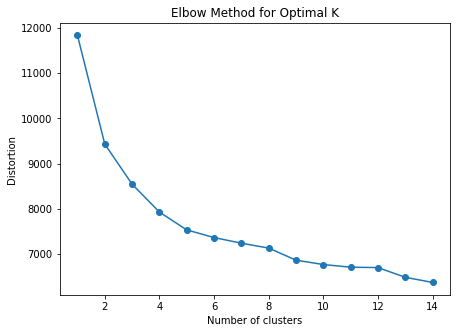

In [14]:
distortions = []
for i in tqdm(range(1, 15)):
    kmedoids = KMedoids(n_clusters=i, random_state=0).fit(x)
    #inertia가 군집 내의 분산을 의미
    distortions.append(kmedoids.inertia_)

# plot
plt.figure(figsize=(7,5))
plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:
num = 5
kmedoids = KMedoids(n_clusters=num, random_state=0).fit(x)
print(kmedoids.labels_)

[0 1 1 ... 1 0 0]


In [ ]:
df_scale['cluster'] = kmedoids.labels_
df_scale

,time_a,time_b1,time_b2,time_b3,time_total,time_answer,time_irrelevant,time_explore_relevant,time_avg_explore,time_avg_btw_events,cluster
ID,,,,,,,,,,,
ARE000027907117,-0.256351,0.000000,0.000000,1.354784,2.633435,0.842444,0.696446,0.880492,0.662073,0.620707,0
ARE000011302798,2.200737,-0.138908,0.000000,0.000000,2.845464,2.441911,1.633623,2.131844,2.420866,1.615650,1
ARE000018804820,1.089504,0.365768,0.000000,0.000000,1.132037,0.903253,-0.153341,0.867389,1.399531,1.207001,1
ARE000039910042,-0.223363,-0.790139,0.000000,0.900318,0.949362,0.390024,1.258008,0.621128,-0.584478,-0.929091,2
ARE000006001557,0.488979,-0.938001,0.000000,0.000000,1.086552,0.970094,1.274917,1.080478,0.315703,0.273977,0
...,...,...,...,...,...,...,...,...,...,...,...
USA000015004612,-0.482185,0.048929,0.000000,0.000000,-1.291097,-1.383871,-0.580854,-1.563623,-0.599577,-0.462124,5
USA000015004637,0.559925,0.490189,0.000000,0.000000,0.110881,0.205151,0.139633,0.154334,0.723796,0.571042,4
USA000007902358,0.868479,0.648600,0.000000,0.000000,0.538604,0.674520,-0.675679,0.580155,1.171397,1.331245,1


In [ ]:
original['cluster'] = kmedoids.labels_
original

,ID,cnt,time_a,time_b1,time_b2,time_b3,time_b4,time_start,time_solving,time_total,...,events_num,sequence,length,credit,OECD,ratio,mean,weight,gender,cluster
0,ARE000027907117,ARE,2.442347,2.197225,0.000000,3.594569,0.000000,1.799397,1.644610,1.855088,...,15,bab,3,1,0,0.64,391.500000,7638.195150,2,0
1,ARE000011302798,ARE,4.989071,2.104134,0.000000,0.000000,0.000000,1.477276,1.854589,1.873494,...,30,aab,3,1,0,0.37,212.100000,4349.167700,2,1
2,ARE000018804820,ARE,3.837299,2.442347,0.000000,0.000000,0.000000,1.554537,1.627475,1.724756,...,10,ab,2,1,0,0.28,168.500000,3287.447976,1,1
3,ARE000039910042,ARE,2.476538,1.667707,0.000000,2.388763,2.850707,1.406565,1.661441,1.708899,...,43,babab,5,1,0,0.37,227.000000,4428.787482,1,2
4,ARE000006001557,ARE,3.214868,1.568616,0.000000,0.000000,3.449988,1.203616,1.702884,1.720808,...,25,abab,4,1,0,0.61,338.428571,7308.636611,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7186,USA000015004612,USA,2.208274,2.230014,0.000000,0.000000,0.000000,1.339048,1.372307,1.514410,...,8,ab,2,1,1,0.81,446.571429,9644.068403,1,5
7187,USA000015004637,USA,3.288402,2.525729,0.000000,0.000000,0.000000,1.394995,1.559028,1.636112,...,10,ab,2,1,1,0.38,232.100000,4528.288874,2,4
7188,USA000007902358,USA,3.608212,2.631889,0.000000,0.000000,0.000000,1.446093,1.596503,1.673242,...,8,ab,2,1,1,0.79,430.947368,9433.340364,1,1
7189,USA000007902371,USA,3.535145,0.000000,2.821379,0.000000,0.000000,1.268981,1.595709,1.637354,...,11,ab,2,1,1,0.37,225.600000,4401.473374,1,0


In [ ]:
#original.to_csv('5_NewClustering_2_b1,b2,total,urre,eicketexplore,avg_events,length_8C.csv')

# 두 변수 상관이 너무 높음

Text(0.5, 0, 'length')

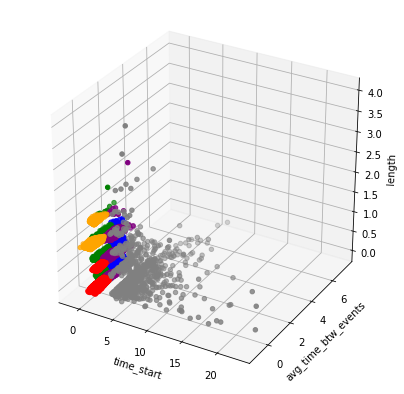

In [ ]:
# 3차원 코드 참고
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
colors = ['r','b','g','purple','orange','gray']

for i, color in enumerate(colors):
    x = df_scale[df_scale['cluster'] == i]['time_start']
    y = df_scale[df_scale['cluster'] == i]['avg_time_btw_events']
    z = df_scale[df_scale['cluster'] == i]['length']
    ax.scatter(x,y,z,c=color,marker='o')

ax.set_xlabel('time_start')
ax.set_ylabel('avg_time_btw_events')
ax.set_zlabel('length')